# Projektin tavoitteena on luoda mahdollisimman tarkka malli jolla ennustaa Titanicin onnettomuuden selviytyjät. 

##### Ryhmä 5: Niko Varjonen, Eetu Turakainen, Oskari Ansamaa, Vili Korhonen

# Importoinnit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier

# Datan tuonti

In [2]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Datan katselua

In [3]:
data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mitchell, Mr. Henry Michael",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Histogrammi matkustajien iästä

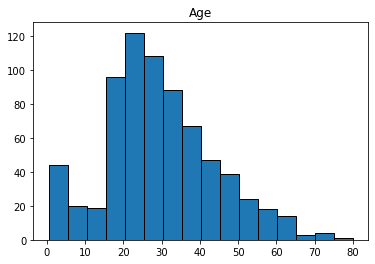

In [4]:
plt.hist(data['Age'], 16, edgecolor='k')
plt.title('Age')
plt.show()

### Histogrammi kunkin luokan matkustajamäärästä

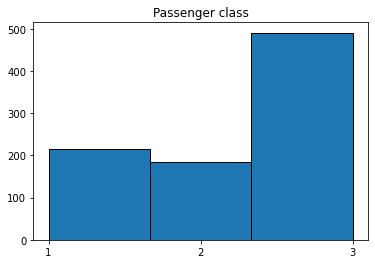

In [5]:
plt.hist(data['Pclass'], 3, edgecolor='k')
plt.xticks([1,2,3])
plt.title('Passenger class')
plt.show()

### Histogrammi puolisojen ja sisarusten määrästä

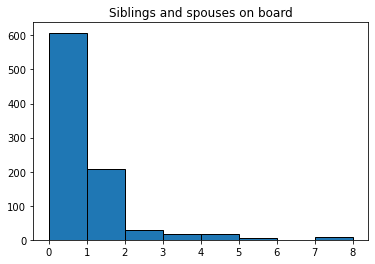

In [6]:
plt.hist(data['SibSp'], 8, edgecolor='k')
plt.title('Siblings and spouses on board')
plt.show()

### Histogrammi lapsien ja aikuisten määrästä 

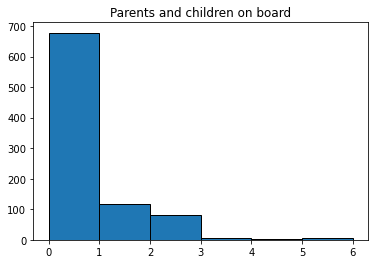

In [7]:
plt.hist(data['Parch'], 6, edgecolor='k')
plt.title('Parents and children on board')
plt.show()

In [8]:
pd.pivot_table(data, index = 'Survived', values = ['Age','Parch','Fare','Pclass'])

,Age,Fare,Parch,Pclass
Survived,,,,
0,30.626179,22.117887,0.329690,2.531876
1,28.343690,48.395408,0.464912,1.950292


### Verrataan selviytymistä luokkien välillä

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

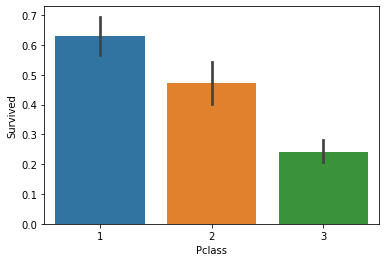

In [9]:
sns.barplot(x='Pclass', y='Survived', data=data)

- Kuvasta selviää että paremmalla luokalla oli huomattava etu selviytymisessä

### Verrataan selviytymistä sisarusten/puolisoiden määrässä

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

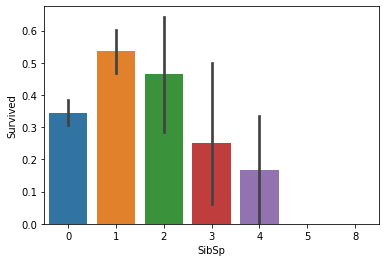

In [10]:
sns.barplot(x='SibSp', y='Survived', data=data)

- Mitä enemmän matkustajalla oli mukana sisaruksia, sitä huonommaksi selviytymisprosentti meni. Kuitenkin jos ei ollut yhtään sisarusta mukana, selviytyminen oli epätodennäköisempää kuin niillä kenellä oli 1-2. 

### Verrataan sukupuolen vaikutusta selviytymiseen

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

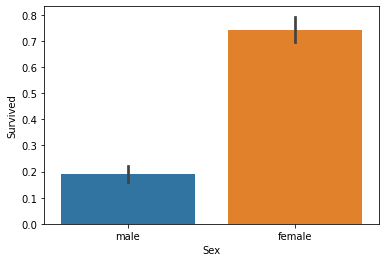

In [11]:
sns.barplot(x='Sex', y='Survived', data=data)

- Kuvasta selviää, että naisilla oli paljon korkeampi selviytymistodennäköisyys kuin miehillä.

### Alhaalla vertailussa hyttiluokat, ikä ja selviytyminen.

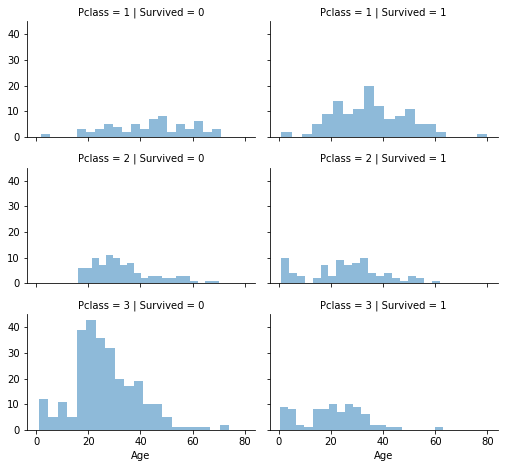

In [12]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [13]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Korrelaatio selviytymisen ja muiden kolumnien välillä

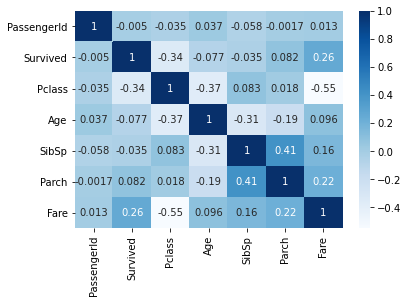

In [14]:
def titanic_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="Blues")
    
titanic_corr(data)

# Data siivousta

### Testi datan katselua

In [15]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


### Embarked rivi, täytetään tyhjät rivit yleisimmällä arvolla

In [16]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
data = data.fillna({"Embarked": "S"})

In [18]:
combine = [data, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


### Groupataan tittelit paremmin, jotta ne on helpompi muuttaa numeerisiksi

In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


### Muutetaan tittelit numeerisiksi

In [20]:
title = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title)
    dataset['Title'] = dataset['Title'].fillna(0)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Age rivi, täytetään tyhjät arvot mean arvolla

In [21]:
data["Age"] = data["Age"].replace(np.NaN, data["Age"].mean())

### Dropataan turhat columnit / rivit

In [22]:
# dropataan Name
data = data.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

# dropataan Fare
data = data.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

# dropataan Ticket
data = data.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

# dropataan Cabin
data = data.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

### Sex columni, muutetaan arvot numeerisiksi

In [23]:
sex_mapping = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,0,22.0,1,0,S,1
1,2,1,1,1,38.0,1,0,C,3
2,3,1,3,1,26.0,0,0,S,2
3,4,1,1,1,35.0,1,0,S,3
4,5,0,3,0,35.0,0,0,S,1


### Embarked columni, muutetaan arvot numeerisiksi

In [24]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
data['Embarked'] = data['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

### Testataan miltä data näyttää

In [25]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,0,22.0,1,0,1,1
1,2,1,1,1,38.0,1,0,2,3
2,3,1,3,1,26.0,0,0,1,2
3,4,1,1,1,35.0,1,0,1,3
4,5,0,3,0,35.0,0,0,1,1


In [26]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,892,3,0,34.5,0,0,3,1
1,893,3,1,47.0,1,0,1,3
2,894,2,0,62.0,0,0,3,1
3,895,3,0,27.0,0,0,1,1
4,896,3,1,22.0,1,1,1,3


# Modelin testausta

In [27]:
from sklearn.model_selection import train_test_split

predictors = data.drop(['Survived', 'PassengerId'], axis=1)
target = data["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, 
                                                  random_state = 0)

### Gaussian Naive Bayes

In [28]:
gaussian = GaussianNB()
cv = cross_val_score(gaussian,x_train,y_train,cv=7)
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(cv)
print(acc_gaussian)

[0.8        0.7979798  0.83838384 0.81818182 0.77777778 0.84848485
 0.86868687]
78.17


### Logistic Regression

In [29]:
logreg = LogisticRegression(max_iter=2000)
cv = cross_val_score(logreg,x_train,y_train,cv=7)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(cv)
print(acc_logreg)

[0.77       0.81818182 0.7979798  0.80808081 0.7979798  0.84848485
 0.85858586]
79.7


### Support Vector Machines

In [30]:
svc = SVC()
cv = cross_val_score(svc,x_train,y_train,cv=7)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(cv)
print(acc_svc)

[0.65       0.5959596  0.63636364 0.65656566 0.5959596  0.66666667
 0.64646465]
66.5


### Decision Tree

In [31]:
decisiontree = DecisionTreeClassifier()
cv = cross_val_score(decisiontree,x_train,y_train,cv=7)
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(cv)
print(acc_decisiontree)

[0.68       0.80808081 0.86868687 0.80808081 0.78787879 0.7979798
 0.83838384]
77.66


### Random Forest

In [32]:
randomforest = RandomForestClassifier()
cv = cross_val_score(randomforest,x_train,y_train,cv=7)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(cv)
print(acc_randomforest)

[0.75       0.77777778 0.83838384 0.77777778 0.80808081 0.81818182
 0.78787879]
79.19


### KNN

In [33]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x_train,y_train,cv=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(cv)
print(acc_knn)

[0.73       0.76767677 0.83838384 0.80808081 0.78787879 0.80808081
 0.81818182]
78.17


### Stochastic Gradient Descent

In [34]:
sgd = SGDClassifier()
cv = cross_val_score(sgd,x_train,y_train,cv=7)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(cv)
print(acc_sgd)

[0.65       0.4040404  0.73737374 0.76767677 0.7979798  0.74747475
 0.78787879]
76.14


### Gradient Boosting Classifier

In [35]:
gbk = GradientBoostingClassifier()
cv = cross_val_score(gbk,x_train,y_train,cv=7)
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(cv)
print(acc_gbk)

[0.79       0.80808081 0.87878788 0.81818182 0.77777778 0.84848485
 0.84848485]
82.23


## Verrataan modeleita taulukossa

In [36]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Classifier,82.23
2,Logistic Regression,79.70
3,Random Forest,79.19
1,KNN,78.17
4,Naive Bayes,78.17
5,Decision Tree,77.66
6,Stochastic Gradient Descent,76.14
0,Support Vector Machines,66.50


### Accuracy / Confusion matrix jne.

s_train = data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
d_train = data[['Survived']]

sgd_clf = SGDClassifier(max_iter=50, random_state=42)
sgd_clf.fit(s_train, d_train.values.ravel())
cross_clf_score = cross_val_score(sgd_clf, x_train, y_train, cv = 3, scoring = 'accuracy')
cross_clf_score.mean()

y_train_clf_pred = cross_val_predict(sgd_clf, s_train, d_train.values.ravel(), cv=3)
confusion_matrix(y_train, y_train_clf_pred )

print(precision_score(y_train, y_train_clf_pred ))

print(recall_score(y_train, y_train_clf_pred ))

print(f1_score(y_train, y_train_clf_pred ))

## Tehdään ennustus

### Valitaan Gradient Boosting Classifier, koska se antoi parhaimmen tuloksen modelien testauksessa

In [37]:
test_ids = test["PassengerId"]
y = data["Survived"]
X = data.drop("Survived", axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y)

In [38]:
clf = GradientBoostingClassifier(random_state=0, n_estimators=100).fit(X_train, y_train)

In [39]:
predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.7937219730941704

### Täytetään test data Age tyhjät arvot mediaanilla

In [40]:
test.Age = test.Age.fillna(test.Age.median())

### Tarkistetaan, ettei ole enää nolla-arvoja

In [41]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
Title          0
dtype: int64

In [42]:
submission_preds = clf.predict(test)

### Tehdään datasta csv tiedosta, joka submitataan Kaggleen

In [43]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": submission_preds,
                  })

In [44]:
df.to_csv("submission.csv", index=False)

# Arviointi

- Pääsimme tavoitteeseemme, joka oli saada mahdollisimman tarkka malli, jolla ennustaa Titanicin selviytyjiä. Sovimme projektin aikana, ettemme fine-tunaa malleja, koska emme ymmärtäneet, miten tämä tulisi tehdä. Tästä huolimatta pääsimme projektin aikana testaamaan eri malleja sekä kokeilemaan millaisia tuloksia niillä sai. Tulosten perusteella valitsimme parhaiten suoriutuneen mallin, joka oli Gradient Boosting Classifier. 
- Lähetettyämme submissionin Kagglelle tulokseksi tuli 0.77033. Olemme tyytyväisiä tähän tulokseen, joka on hyvä, mutta parantamisen varaa kuitenkin on huomattavasti. 